# Advanced Bioinformatics Tool Benchmarking Project
## Benchmarking population structure tools PLINK2, ADMIXTURE and VCF2PCACluster
#### Documentation for tools
PLINK2: https://www.cog-genomics.org/plink/2.0/strat

ADMIXTURE: https://dalexander.github.io/admixture/download.html

VCF2PCACluster: https://github.com/hewm2008/VCF2PCACluster

#### Shell Scripts for each tool
Located: [Shell Scripts](./shell_scripts.html)

### Benchmarking Python Code

Download for psutil if not already installed

In [3]:
%pip install pyarrow psutil

Note: you may need to restart the kernel to use updated packages.


Tools used for measuring run time and memory usage: time, psutil, and subprocess. 
Subprocess module is used to run command-line tools from within the Python script as if you were typing it in the terminal. Whatever you are passing to 'tool' is the command that would be run in the shell. 

#### Real data Benchmarking
#SNPs = ~50,000

In [ ]:
import time
import psutil
import subprocess

def benchmark(tool, output_file):
    # Start the process using subprocess.Popen for process monitoring
    process = subprocess.Popen(tool, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    # Measure run time
    start_time = time.time()
    memory_usage = None
    # Monitor process and capture memory usage during execution
    while process.poll() is None:
        try:
            pid = process.pid
            process_info = psutil.Process(pid)
            memory_usage = process_info.memory_info().rss  # In bytes
            output_file.write(f'Memory Usage: {memory_usage / (1024 ** 2):.2f} MB\n')
        except psutil.NoSuchProcess:
            output_file.write("Process terminated before memory usage could be captured\n")
        time.sleep(1)  # Polling interval (adjust based on file size)
    
    end_time = time.time()
    process_time = end_time - start_time
    
    # Get output and error messages
    stdout, stderr = process.communicate()

    output_file.write(f'Execution Time: {process_time:.2f} seconds\n')
    output_file.write(f'Standard Output:\n{stdout}\n')
    output_file.write(f'Standard Error:\n{stderr}\n')
    output_file.write('----------------------------------------------------\n')

    # Returns run time, output, standard error, and memory usage
    return process_time, stdout, stderr, memory_usage

# Commands for each tool
plink2 = 'plink2 --ped real_50000.ped --map real_50000.map --pca 10 --chr-set 50 --out ~/benchmarking_project/final_project/plink2_results/real_50000_output'
admixture = '~/benchmarking_project/admixture/admixture/admixture ~/benchmarking_project/final_project/filtered_real_50000.bed 3'
vcf2pcacluster = '~/benchmarking_project/VCF2PCACluster/bin/VCF2PCACluster -InVCF real_50000.vcf -OutPut ~/benchmarking_project/final_project/VCF2PCACluster_results/vcf2pcacluster_real_50000'

# Open a file to write the output
with open('benchmark_results_50000.txt', 'w') as output_file:
    output_file.write("\nBenchmarking plink2\n")
    benchmark(plink2, output_file)
    output_file.write("\nBenchmarking ADMIXTURE\n")
    benchmark(admixture, output_file)
    output_file.write("\nBenchmarking VCF2PCACluster\n")
    benchmark(vcf2pcacluster, output_file)


#SNPs = ~1.1mil

In [ ]:
import time
import psutil
import subprocess

def benchmark(tool, output_file):
    # Start the process using subprocess.Popen for better process monitoring
    process = subprocess.Popen(tool, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    # Measure run time
    start_time = time.time()
    memory_usage = None
    # Monitor process and capture memory usage during execution
    while process.poll() is None:
        try:
            pid = process.pid
            process_info = psutil.Process(pid)
            memory_usage = process_info.memory_info().rss  # In bytes
            output_file.write(f'Memory Usage: {memory_usage / (1024 ** 2):.2f} MB\n')
        except psutil.NoSuchProcess:
            output_file.write("Process terminated before memory usage could be captured\n")
        time.sleep(5)  # Polling interval (adjust based on file size)
    
    end_time = time.time()
    process_time = end_time - start_time
    
    # Get output and error messages
    stdout, stderr = process.communicate()

    output_file.write(f'Execution Time: {process_time:.2f} seconds\n')
    output_file.write(f'Standard Output:\n{stdout}\n')
    output_file.write(f'Standard Error:\n{stderr}\n')
    output_file.write('----------------------------------------------------\n')

    # Returns run time, output, standard error, and memory usage
    return process_time, stdout, stderr, memory_usage

# Commands for each tool
admixture = '~/benchmarking_project/admixture/admixture/admixture ~/benchmarking_project/final_project/filtered_real_3.bed 4'
vcf2pcacluster = '~/benchmarking_project/VCF2PCACluster/bin/VCF2PCACluster -InVCF real_3.vcf.gz -OutPut ~/benchmarking_project/final_project/VCF2PCACluster_results/vcf2pcacluster_real_3_bench'
plink2 = 'plink2 --ped real_3.ped --map real_3.map --pca 10 --out ~/benchmarking_project/final_project/plink2_results/real_3_output'
# Open a file to write the output
with open('benchmark_results_1mil.txt', 'w') as output_file:
    output_file.write("\nBenchmarking ADMIXTURE\n")
    benchmark(admixture, output_file)
    output_file.write("\nBenchmarking VCF2PCACluster\n")
    benchmark(vcf2pcacluster, output_file)
    output_file.write("\nBenchmarking PLINK2\n")
    benchmark(plink2, output_file)


#### Truth data Benchmarking
#SNPs = ~2.3mil

In [ ]:
import time
import psutil
import subprocess

def benchmark(tool, output_file):
    # Start the process using subprocess.Popen for better process monitoring
    process = subprocess.Popen(tool, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    # Measure run time
    start_time = time.time()
    memory_usage = None
    # Monitor process and capture memory usage during execution
    while process.poll() is None:
        try:
            pid = process.pid
            process_info = psutil.Process(pid)
            memory_usage = process_info.memory_info().rss  # In bytes
            output_file.write(f'Memory Usage: {memory_usage / (1024 ** 2):.2f} MB\n')
        except psutil.NoSuchProcess:
            output_file.write("Process terminated before memory usage could be captured\n")
        time.sleep(0.1)  # Polling interval (adjust based on file size)
    
    end_time = time.time()
    process_time = end_time - start_time
    
    # Get output and error messages
    stdout, stderr = process.communicate()

    output_file.write(f'Execution Time: {process_time:.2f} seconds\n')
    output_file.write(f'Standard Output:\n{stdout}\n')
    output_file.write(f'Standard Error:\n{stderr}\n')
    output_file.write('----------------------------------------------------\n')

    # Returns run time, output, standard error, and memory usage
    return process_time, stdout, stderr, memory_usage

# Commands for each tool
admixture = '~/benchmarking_project/admixture/admixture/admixture ~/benchmarking_project/final_project/real_truth_4pop.bed 4'
vcf2pcacluster = '~/benchmarking_project/VCF2PCACluster/bin/VCF2PCACluster -InVCF real_truth_4pop.genotypes.vcf.gz -OutPut ~/benchmarking_project/final_project/VCF2PCACluster_results/vcf2pcacluster_real_truth_4pop'
plink2 = 'plink2 --ped real_truth_4pop.ped --map real_truth_4pop.map --pca 6 approx --out ~/benchmarking_project/final_project/plink2_results/real_truth_4pop_output'
# Open a file to write the output
with open('benchmark_results_2mil.txt', 'w') as output_file:
    output_file.write("\nBenchmarking ADMIXTURE\n")
    benchmark(admixture, output_file)
    output_file.write("\nBenchmarking VCF2PCACluster\n")
    benchmark(vcf2pcacluster, output_file)
    output_file.write("\nBenchmarking PLINK2\n")
    benchmark(plink2, output_file)


### Code for running python script in shell terminal

In [ ]:
nohup python3 benchmarking_truth.py > ~/benchmarking_project/final_project/logs/benchmarking_truth.log 2>&1 &

In [ ]:
nohup python3 benchmarking_real3.py > ~/benchmarking_project/final_project/logs/benchmarking_real3.log 2>&1 &

In [ ]:
nohup python benchmarking_50000.py > ~/benchmarking_project/final_project/logs/benchmarking_real_50000.log 2>&1 &

### Benchmarking Results

#### Results for 50,000SNPs
ADMIXTURE
Execution Time = 36.05 seconds
Memory Usage = 1.04 MB


VCF2PCACluster
Execution Time: 8.01 seconds
Memory Usage: 0.94 MB


PLINK2
Execution Time: 1.00 seconds
Memory Usage: 0.32 MB

#### Results for 1.1mil SNPs
ADMIXTURE
Execution Time = 25632.86 seconds
Memory Usage = 0.97 MB


VCF2PCACluster
Execution Time: 355.30 seconds
Memory Usage: 0.93 MB


PLINK2
Execution Time: 125.11 seconds
Memory Usage: 0.98 MB

#### Results for 2.3mil SNPs
ADMXITURE
Memory Usage: 0.94 MB
Execution Time: 26761.08 seconds


PLINK2
Memory Usage: 0.96 MB
Execution Time: 91.00 seconds, I used a parameter that makes it run faster bc i thought plink2 was dependent on snps not individuals, so may need to rerun with basic parameters since it didn't recommend running it like that


VCF2PCACluster
Memory Usage: 0.94 MB
Execution Time: 442.20 seconds

## Benchmarking Plots

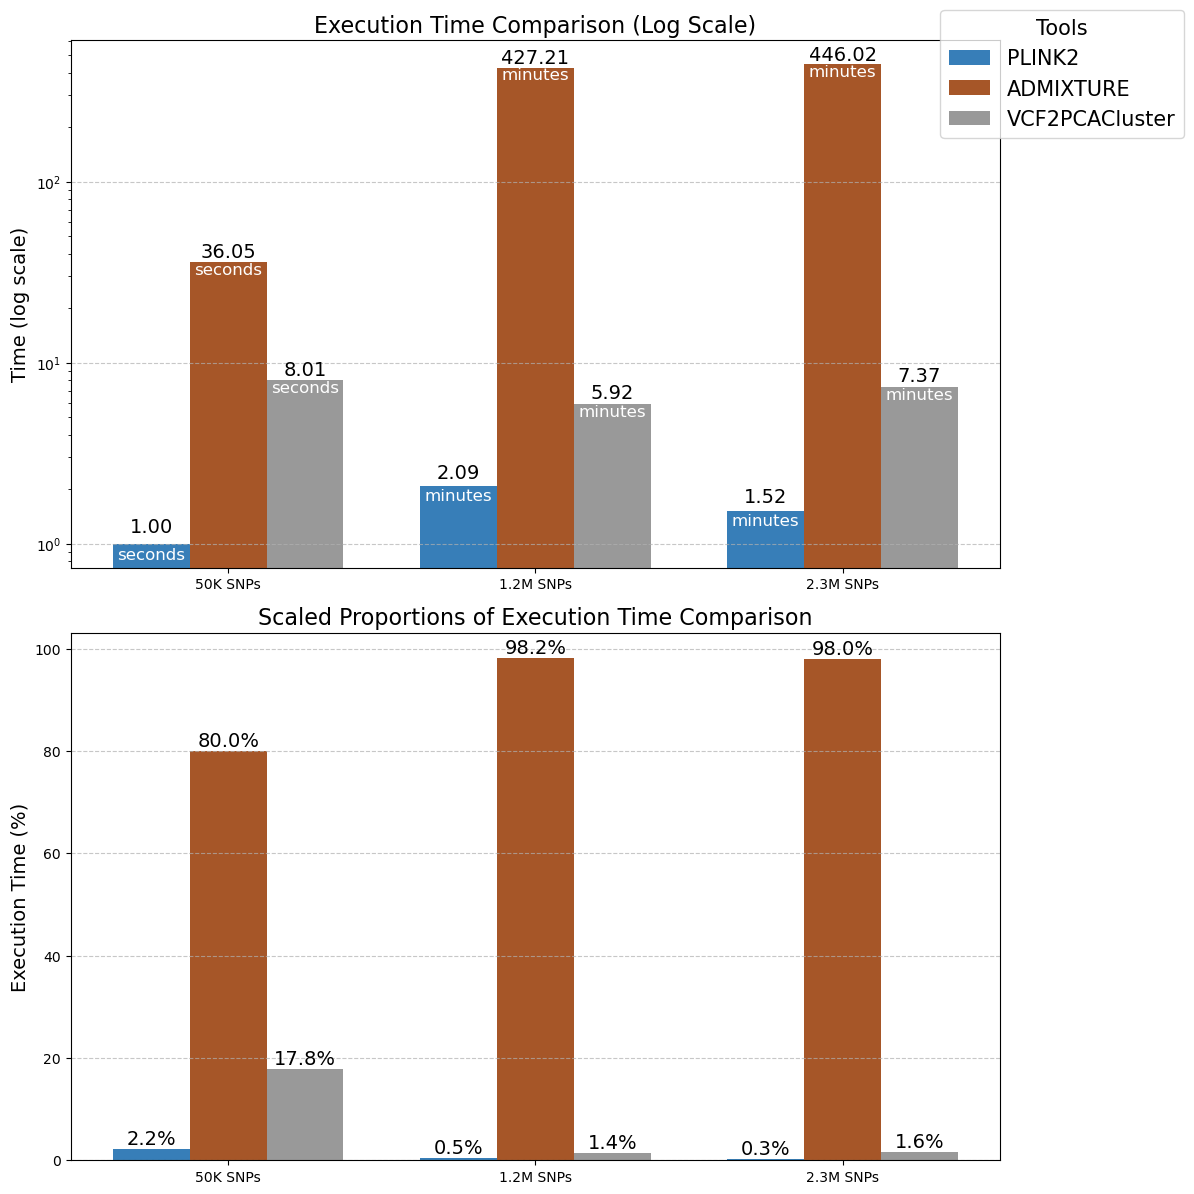

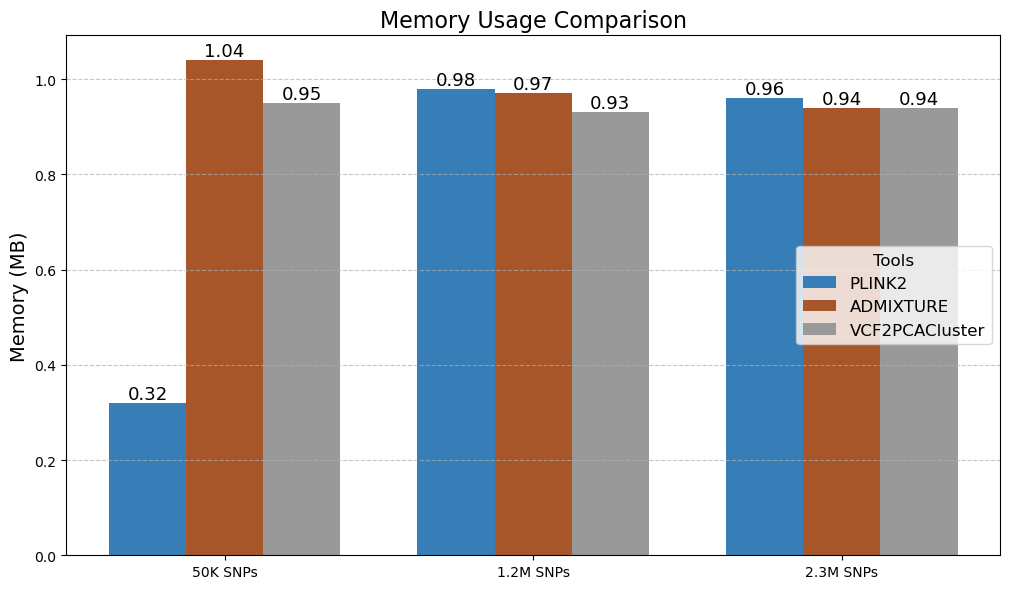

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Data
datasets = ["50K SNPs", "1.2M SNPs", "2.3M SNPs"]
tools = ['PLINK2', 'ADMIXTURE', 'VCF2PCACluster']

# Execution times (in seconds)
execution_times = [
    [1.00, 36.05, 8.01],       # 50K SNPs
    [125.11, 25632.86, 355.30],  # 1.2M SNPs
    [91.00, 26761.08, 442.20]   # 2.3M SNPs
]

# Memory usage (in MB)
memory_usage = [
    [0.32, 1.04, 0.95],  # 50K SNPs
    [0.98, 0.97, 0.93],  # 1.2M SNPs
    [0.96, 0.94, 0.94]   # 2.3M SNPs
]

# Normalize execution times by total (sum) in each SNP group
total_times = [sum(times) for times in execution_times]
normalized_times = [[(time / total_times[idx]) * 100 for time in times] for idx, times in enumerate(execution_times)]
# Colorblind-friendly colors
colors = ['#377eb8', '#a65628', '#999999']

# Convert execution times to minutes for larger datasets only if time > 60 seconds for better readability
converted_times = [[t / 60 if t > 60 else t for t in times] for times in execution_times]
time_units = [["seconds" if t <= 60 else "minutes" for t in times] for times in execution_times]

# Plot execution times in a single figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot execution times (log scale) on the first subplot
for i, tool in enumerate(tools):
    execution_data = [ct[i] for ct in converted_times] # Get execution time data for the current tool
    bars = axes[0].bar(
        np.arange(len(datasets)) + i * 0.25, # Offset the bars for each tool
        execution_data, 
        width=0.25, 
        color=colors[i]
    )
    # Add the number value above the bar
    for j, bar in enumerate(bars):
        height = bar.get_height()
        unit = time_units[j][i]  # Get the correct unit for each dataset and tool
        axes[0].text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.1,  # Positioning value above the bar
            f"{height:.2f}",  # Number above the bar
            ha='center', 
            va='bottom', 
            fontsize=14
        )
        # Add the unit label below the value
        axes[0].text(
            bar.get_x() + bar.get_width() / 2, 
            height - 0.05,  # Position unit label below the number
            f"{unit}", 
            ha='center', 
            va='top', 
            fontsize=12,
            color='white' 
        )

axes[0].set_yscale('log')  # Use logarithmic scale for execution times
axes[0].set_title("Execution Time Comparison (Log Scale)", fontsize=16)
axes[0].set_ylabel("Time (log scale)", fontsize=14)
axes[0].set_xticks(np.arange(len(datasets)) + 0.25)
axes[0].set_xticklabels(datasets)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Plot normalized execution times on the second subplot
for i, tool in enumerate(tools):
    normalized_data = [nt[i] for nt in normalized_times] # Get normalized execution time data for the current tool
    bars = axes[1].bar(
        np.arange(len(datasets)) + i * 0.25,  # Offset the bars for each tool
        normalized_data, 
        width=0.25, 
        color=colors[i]
    )
    # Add percentage labels above each bar
    for bar in bars:
        height = bar.get_height()
        axes[1].text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.1,  # Positioning percentage above the bar
            f"{height:.1f}%", 
            ha='center', 
            va='bottom', 
            fontsize=14
        )

axes[1].set_title("Scaled Proportions of Execution Time Comparison", fontsize=16)
axes[1].set_ylabel("Execution Time (%)", fontsize=14)
axes[1].set_xticks(np.arange(len(datasets)) + 0.25)
axes[1].set_xticklabels(datasets)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Add legend
fig.legend(tools, title="Tools", loc="upper right", fontsize=15, title_fontsize=15)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for the legend
plt.show()

# Plot memory usage in a separate figure
plt.figure(figsize=(12, 6))

for i, tool in enumerate(tools):
    memory_data = [mu[i] for mu in memory_usage]  # Get memory usage data for the current tool
    bars = plt.bar(
        np.arange(len(datasets)) + i * 0.25, # Offset the bars for each tool
        memory_data, 
        width=0.25, 
        color=colors[i]
    )
    # Add labels to the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f"{height:.2f}", 
            ha='center', 
            va='bottom', 
            fontsize=13
        )

plt.title("Memory Usage Comparison", fontsize=16)
plt.ylabel("Memory (MB)", fontsize=14)
plt.xticks(np.arange(len(datasets)) + 0.25, datasets)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add legend
plt.legend(tools, title="Tools", loc="center right", fontsize=12, title_fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## Accuracy tests

### PLINK2 Accuracy Assessment and Plotting

In [21]:
import pandas as pd

# Load the eigenvec file
eigenvec = pd.read_csv(
    '/Users/Tyler/Documents/BIOI500/final_project/plink2_results/ground_truth_all.eigenvec', 
    sep=r'\s+',  # Handles spaces or tabs as delimiters
    header=None,  # No header in the file
    comment='#'   # Ignores comment lines starting with #
)

# Assign appropriate column names to eigenvec
eigenvec.columns = ['FID', 'IID'] + [f'PC{i+1}' for i in range(eigenvec.shape[1] - 2)]

# Load the eigenval file
eigenval = pd.read_csv(
    '/Users/Tyler/Documents/BIOI500/final_project/plink2_results/ground_truth_all.eigenval', 
    sep='\t',  # Tab-delimited
    header=None  # No header in the file
)

# Assign a column name to eigenval
eigenval.columns = ['Eigenvalue']

# Display the loaded data
print("Eigenvalues:")
print(eigenval.head())

print("\nEigenvectors:")
print(eigenvec.head())

Eigenvalues:
   Eigenvalue
0    44.91190
1    14.43030
2     5.71093
3     4.14739
4     3.77819

Eigenvectors:
       FID      IID       PC1       PC2       PC3       PC4       PC5  \
0  HG00096  HG00096 -0.011837  0.024212  0.015167 -0.017409 -0.000317   
1  HG00097  HG00097 -0.011417  0.026713  0.014775 -0.018720 -0.000773   
2  HG00099  HG00099 -0.011892  0.025965  0.015633 -0.018309 -0.000431   
3  HG00100  HG00100 -0.011852  0.025955  0.015725 -0.015454 -0.000781   
4  HG00101  HG00101 -0.012013  0.026743  0.016400 -0.017475 -0.001504   

        PC6       PC7       PC8       PC9      PC10  
0 -0.000411 -0.000594 -0.001417  0.001067 -0.000634  
1 -0.000983  0.000265  0.000520  0.000040 -0.000440  
2  0.000300 -0.001747 -0.000186 -0.000504 -0.000037  
3 -0.000823  0.001255  0.000936  0.001082  0.000918  
4 -0.000780 -0.001355 -0.000969  0.000241 -0.000228  


In [22]:
# Load the population assignment file
pop_assignments = pd.read_csv('all_samples.txt', sep='\t')

# Drop all columns with names that start with "Unnamed"
pop_assignments = pop_assignments.loc[:, ~pop_assignments.columns.str.contains('^Unnamed')]

# Check the first few rows of the cleaned DataFrame
print(pop_assignments.head())

    sample  pop super_pop  gender
0  HG00096  GBR       EUR    male
1  HG00097  GBR       EUR  female
2  HG00099  GBR       EUR  female
3  HG00100  GBR       EUR  female
4  HG00101  GBR       EUR    male


In [23]:
# Rename columns in eigenvec to align with population assignments
eigenvec.columns = ['FID', 'SampleName'] + [f'PC{i+1}' for i in range(eigenvec.shape[1] - 2)]

# Merge eigenvec with population assignments
merged_df = eigenvec.merge(pop_assignments[['sample', 'super_pop']], 
                           left_on='SampleName', 
                           right_on='sample', 
                           how='inner')

# Drop the duplicate 'sample' column after merge
merged_df.drop(columns=['sample'], inplace=True)

# Check the merged DataFrame
print(merged_df.head())



       FID SampleName       PC1       PC2       PC3       PC4       PC5  \
0  HG00096    HG00096 -0.011837  0.024212  0.015167 -0.017409 -0.000317   
1  HG00097    HG00097 -0.011417  0.026713  0.014775 -0.018720 -0.000773   
2  HG00099    HG00099 -0.011892  0.025965  0.015633 -0.018309 -0.000431   
3  HG00100    HG00100 -0.011852  0.025955  0.015725 -0.015454 -0.000781   
4  HG00101    HG00101 -0.012013  0.026743  0.016400 -0.017475 -0.001504   

        PC6       PC7       PC8       PC9      PC10 super_pop  
0 -0.000411 -0.000594 -0.001417  0.001067 -0.000634       EUR  
1 -0.000983  0.000265  0.000520  0.000040 -0.000440       EUR  
2  0.000300 -0.001747 -0.000186 -0.000504 -0.000037       EUR  
3 -0.000823  0.001255  0.000936  0.001082  0.000918       EUR  
4 -0.000780 -0.001355 -0.000969  0.000241 -0.000228       EUR  


In [ ]:
from sklearn.cluster import KMeans

# Using the first two principal components (PC1, PC2) for clustering
pca_data = merged_df[['PC1', 'PC2']]

# Perform KMeans clustering for K = 5
kmeans = KMeans(n_clusters=5)  
merged_df['PredictedCluster'] = kmeans.fit_predict(pca_data) # Assign cluster labels

# Check the resulting clusters
print(merged_df[['SampleName', 'PredictedCluster']])

     SampleName  PredictedCluster
0       HG00096                 3
1       HG00097                 3
2       HG00099                 3
3       HG00100                 3
4       HG00101                 3
...         ...               ...
2499    NA21137                 1
2500    NA21141                 1
2501    NA21142                 1
2502    NA21143                 1
2503    NA21144                 1

[2504 rows x 2 columns]


PredictedCluster    0    1    2    3   4
super_pop                               
AFR               653    5    0    0   3
AMR                 4  155    0   90  98
EAS                 0    0  504    0   0
EUR                 0    0    0  503   0
SAS                 0  452    0    0  37
Accuracy (proportion of individuals correctly grouped by optimal cluster assignment): 0.88


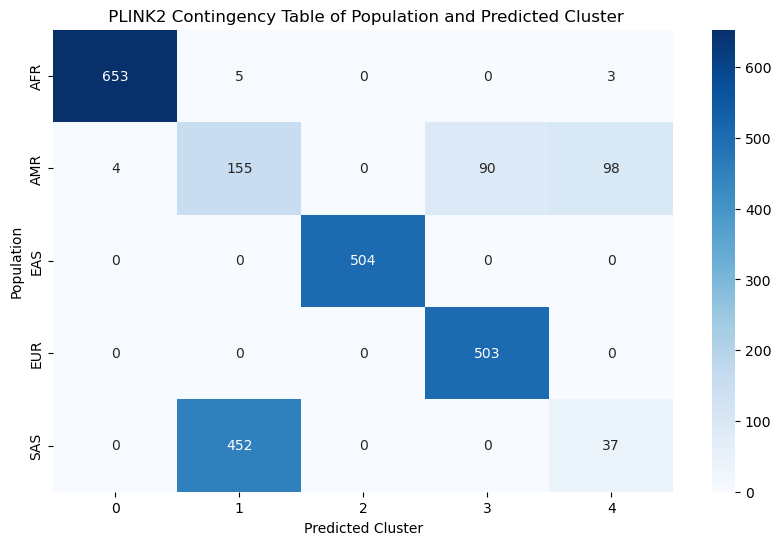

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment  # Hungarian algorithm
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(merged_df['super_pop'], merged_df['PredictedCluster'])
print(contingency_table)
# Convert contingency table to a cost matrix (negative values since we maximize matches)
cost_matrix = -contingency_table.values

# Perform the optimal assignment using the Hungarian algorithm
row_indices, col_indices = linear_sum_assignment(cost_matrix)

# Calculate the accuracy based on the optimal assignment
optimal_matches = contingency_table.values[row_indices, col_indices].sum() # Number of optimal matches
total_individuals = merged_df.shape[0] # Total number of individuals
accuracy = optimal_matches / total_individuals

print(f"Accuracy (proportion of individuals correctly grouped by optimal cluster assignment): {accuracy:.2f}")

# Visualize the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title(' PLINK2 Contingency Table of Population and Predicted Cluster')
plt.ylabel('Population')
plt.xlabel('Predicted Cluster')
plt.show()


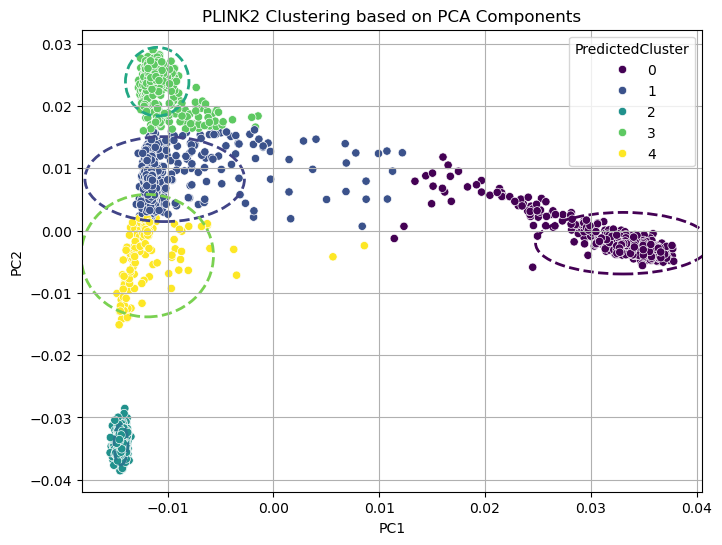

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Calculate centroids of the clusters for plotting purposes
centroids = merged_df.groupby('PredictedCluster')[['PC1', 'PC2']].mean()

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_df['PC1'], y=merged_df['PC2'], hue=merged_df['PredictedCluster'], palette='viridis')

# Add circles around each cluster for visual purposes
for cluster, row in centroids.iterrows():
    # Calculate standard deviation to size the circle
    std_x = merged_df[merged_df['PredictedCluster'] == cluster]['PC1'].std()
    std_y = merged_df[merged_df['PredictedCluster'] == cluster]['PC2'].std()
    circle = mpatches.Ellipse(
        (row['PC1'], row['PC2']),
        width=std_x * 4,  # Scale for visibility
        height=std_y * 4,
        edgecolor=sns.color_palette('viridis', as_cmap=True)(cluster / len(centroids)),  # Change the edge color
        facecolor='none',
        linestyle='--',
        linewidth=2
    )
    plt.gca().add_patch(circle) # Add the circle
    
plt.title('PLINK2 Clustering based on PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

### VCF2PCACluster Accuracy and Plotting

/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_56490/3888873844.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  eigenval = pd.read_csv("/Users/Tyler/Documents/BIOI500/final_project/vcf2pcacluster_results/VCF2PCACluster_results/ground_truth_all.eigenval", delim_whitespace=True)
/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_56490/3888873844.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  eigenvec = pd.read_csv("/Users/Tyler/Documents/BIOI500/final_project/vcf2pcacluster_results/VCF2PCACluster_results/ground_truth_all.eigenvec", delim_whitespace=True)
/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_56490/3888873844.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`

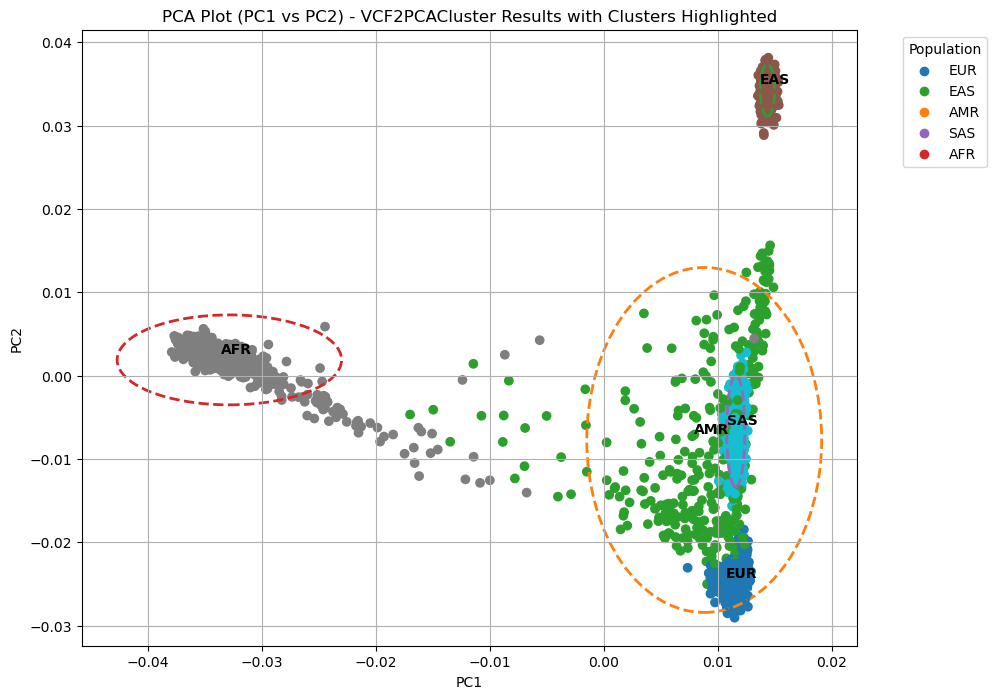

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Load the eigenvec and eigenval files
eigenval = pd.read_csv("/Users/Tyler/Documents/BIOI500/final_project/vcf2pcacluster_results/VCF2PCACluster_results/ground_truth_all.eigenval", delim_whitespace=True)
eigenval.rename(columns={"#eval": "eval"}, inplace=True)  # Rename column for easier access

eigenvec = pd.read_csv("/Users/Tyler/Documents/BIOI500/final_project/vcf2pcacluster_results/VCF2PCACluster_results/ground_truth_all.eigenvec", delim_whitespace=True)
eigenvec.rename(columns={'Group': 'super_pop'}, inplace=True)  # Rename Group to super_pop

# Load metadata with sample labels and set proper column names
metadata = pd.read_csv("all_samples.txt", delim_whitespace=True)
metadata.rename(columns={'sample': 'SampleName'}, inplace=True)  # Rename sample to SampleName

# Merge eigenvec with metadata using SampleName
eigenvec = pd.merge(eigenvec, metadata[['SampleName', 'super_pop']], on='SampleName', how='left')

# Drop the extra 'super_pop_x' column (from eigenvec)
eigenvec.drop(columns=['super_pop_x'], inplace=True)

# Rename column for color mapping
eigenvec.rename(columns={'super_pop_y': 'super_pop'}, inplace=True)

# Define color mapping
color_map = {'EUR': 0, 'AMR': 1, 'EAS': 2, 'AFR': 3, 'SAS': 4}

# Plot PCA (PC1 vs PC2)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    eigenvec['PC1'], 
    eigenvec['PC2'], 
    c=eigenvec['super_pop'].map(color_map), # Map color based on super_pop
    cmap='tab10'
)

# Calculate centroids and standard deviations for each cluster
centroids = eigenvec.groupby('super_pop')[['PC1', 'PC2']].mean()
std_devs = eigenvec.groupby('super_pop')[['PC1', 'PC2']].std()

# Add circles around clusters
ax = plt.gca()
for super_pop, row in centroids.iterrows():
    center_x, center_y = row['PC1'], row['PC2'] # Get centroid
    std_x, std_y = std_devs.loc[super_pop, 'PC1'], std_devs.loc[super_pop, 'PC2'] # Get standard deviation
    ellipse = Ellipse( # Create ellipse
        (center_x, center_y),
        width=std_x * 4,  # Scale by factor for visibility
        height=std_y * 4,
        edgecolor=plt.cm.tab10(color_map[super_pop]),
        facecolor='none',  # Transparent fill
        linestyle='--',
        linewidth=2
    )
    ax.add_patch(ellipse)

# Annotate centroids
for Cluster, row in centroids.iterrows():
    plt.annotate(
        Cluster, 
        (row['PC1'], row['PC2']), # Get centroid
        textcoords="offset points", 
        xytext=(5, 5), 
        ha='center', 
        fontsize=10, 
        color='black', 
        weight='bold'
    )

# Add legend for populations
for pop in eigenvec['super_pop'].unique():
    plt.scatter([], [], c=[plt.cm.tab10(color_map[pop])], label=pop) # Map color based on super_pop
plt.legend(title='Population', loc='upper left', bbox_to_anchor=(1.05, 1.0), ncol=1)

# Final plot settings
plt.title("PCA Plot (PC1 vs PC2) - VCF2PCACluster Results with Clusters Highlighted")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [ ]:
# Select relevant columns for output
output_data = eigenvec[['SampleName', 'super_pop', 'Cluster']]

# Save to a text file
output_file_path = "cluster_assignments.txt" 
output_data.to_csv(output_file_path, sep='\t', index=False)

# Print a confirmation message
print(f"Cluster assignments saved to {output_file_path}")


Cluster assignments saved to cluster_assignments.txt


Previous contingency table:
Cluster    Cluster0  Cluster1  Cluster2  Cluster3
super_pop                                        
AFR               1         3         0       657
AMR               0       342         0         5
EAS             504         0         0         0
EUR               0       503         0         0
SAS               0         0       489         0
New contingency table with missing clusters:
Cluster    Cluster0  Cluster1  Cluster2  Cluster3  MissingCluster0
super_pop                                                         
AFR               1         3         0       657                0
AMR               0       342         0         5                0
EAS             504         0         0         0                0
EUR               0       503         0         0                0
SAS               0         0       489         0                0
Optimal Mapping with Missing Clusters Considered:
{'AFR': 'Cluster3', 'AMR': 'MissingCluster0', 'EAS': 'Clus

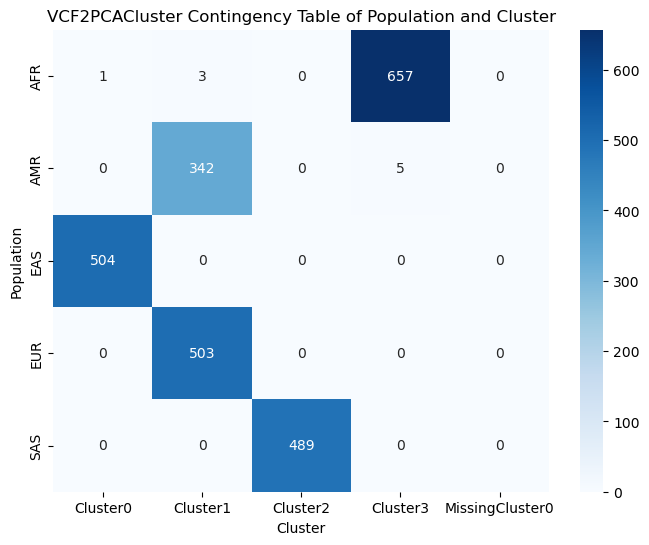

In [ ]:
# Load cluster assignments
cluster_assignments = pd.read_csv('cluster_assignments.txt', sep='\t')

# Create a contingency table of 'super_pop' and 'Cluster'
contingency_table = pd.crosstab(cluster_assignments['super_pop'], cluster_assignments['Cluster']) # Create contingency table
print('Previous contingency table:')
print(contingency_table)

# Add a column of zeros for the missing cluster
expected_clusters = 5
for i in range(expected_clusters - len(contingency_table.columns)): # Iterate over the missing clusters
    contingency_table[f'MissingCluster{i}'] = 0 # Add a column of zeros for the missing cluster
print('New contingency table with missing clusters:')
print(contingency_table)

# Convert to cost matrix
cost_matrix = -contingency_table.values

# Hungarian algorithm
row_indices, col_indices = linear_sum_assignment(cost_matrix) # Optimal mapping

# Optimal mapping
optimal_mapping = {
    contingency_table.index[row]: contingency_table.columns[col] # Get optimal mapping
    for row, col in zip(row_indices, col_indices) # Iterate over the optimal mapping
}
print("Optimal Mapping with Missing Clusters Considered:")
print(optimal_mapping)

# Check if the super_pop is in the correct cluster based on the optimal mapping
merged_df['correct_cluster'] = merged_df.apply(
    lambda row: row['Cluster'] == optimal_mapping.get(row['super_pop'], None), axis=1 
)

# Calculate the accuracy (proportion of correct assignments)
accuracy = merged_df['correct_cluster'].mean()
print(f"Accuracy (proportion of correctly assigned super_pop to optimal cluster): {accuracy:.2f}")

# Visualize the contingency table as a heatmap for better understanding
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title('VCF2PCACluster Contingency Table of Population and Cluster')
plt.ylabel('Population')
plt.xlabel('Cluster')
plt.show()

/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_56490/2923828153.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  eigenval = pd.read_csv("/Users/Tyler/Documents/BIOI500/final_project/vcf2pcacluster_results/VCF2PCACluster_results/ground_truth_all_bestK.eigenval", delim_whitespace=True)
/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_56490/2923828153.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  eigenvec = pd.read_csv("/Users/Tyler/Documents/BIOI500/final_project/vcf2pcacluster_results/VCF2PCACluster_results/ground_truth_all_bestK.eigenvec", delim_whitespace=True)
/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_56490/2923828153.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use 

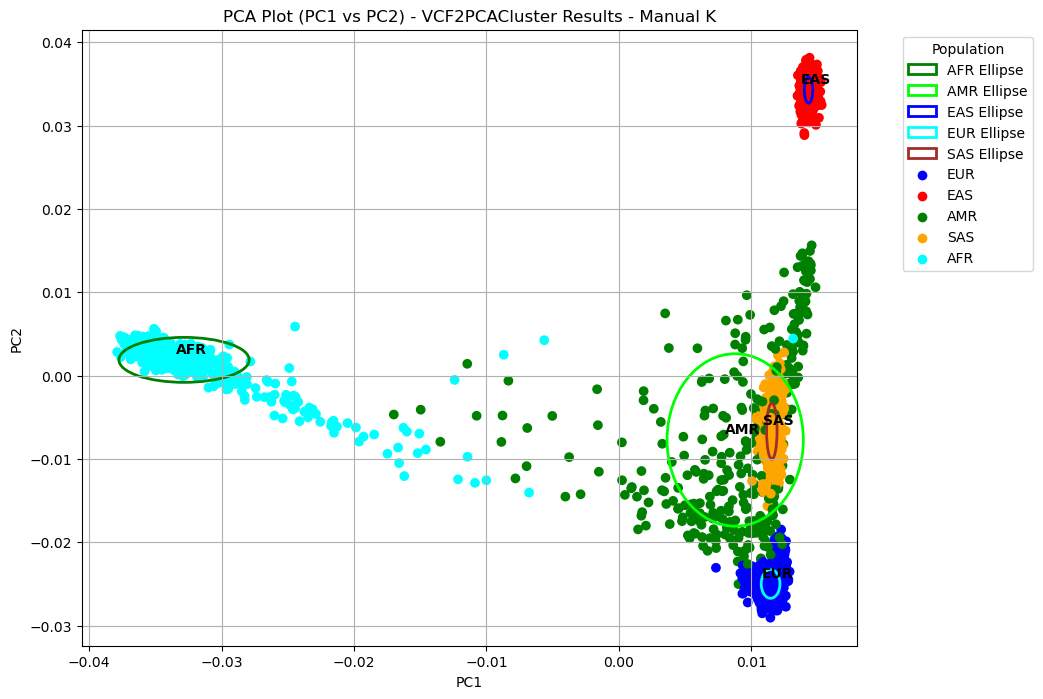

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Load the eigenvec and eigenval files
eigenval = pd.read_csv("/Users/Tyler/Documents/BIOI500/final_project/vcf2pcacluster_results/VCF2PCACluster_results/ground_truth_all_bestK.eigenval", delim_whitespace=True)
eigenval.rename(columns={"#eval": "eval"}, inplace=True)  # Rename column for easier access

eigenvec = pd.read_csv("/Users/Tyler/Documents/BIOI500/final_project/vcf2pcacluster_results/VCF2PCACluster_results/ground_truth_all_bestK.eigenvec", delim_whitespace=True)
eigenvec.rename(columns={'Group': 'super_pop'}, inplace=True)  # Rename Group to super_pop

# Load metadata with sample labels and set proper column names
metadata = pd.read_csv("all_samples.txt", delim_whitespace=True)
metadata.rename(columns={'sample': 'SampleName'}, inplace=True)  # Rename sample to SampleName

# Merge eigenvec with metadata using SampleName
eigenvec = pd.merge(eigenvec, metadata[['SampleName', 'super_pop']], on='SampleName', how='left')

# Drop the extra 'super_pop_x' column (from eigenvec)
eigenvec.drop(columns=['super_pop_x'], inplace=True)

# Rename column for color mapping
eigenvec.rename(columns={'super_pop_y': 'super_pop'}, inplace=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Load the eigenvec and eigenval files
eigenval = pd.read_csv("/Users/Tyler/Documents/BIOI500/final_project/vcf2pcacluster_results/VCF2PCACluster_results/ground_truth_all_bestK.eigenval", delim_whitespace=True)
eigenval.rename(columns={"#eval": "eval"}, inplace=True)  # Rename column for easier access

eigenvec = pd.read_csv("/Users/Tyler/Documents/BIOI500/final_project/vcf2pcacluster_results/VCF2PCACluster_results/ground_truth_all_bestK.eigenvec", delim_whitespace=True)
eigenvec.rename(columns={'Group': 'super_pop'}, inplace=True)  # Rename Group to super_pop

# Load metadata with sample labels and set proper column names
metadata = pd.read_csv("all_samples.txt", delim_whitespace=True)
metadata.rename(columns={'sample': 'SampleName'}, inplace=True)  # Rename sample to SampleName

# Merge eigenvec with metadata using SampleName
eigenvec = pd.merge(eigenvec, metadata[['SampleName', 'super_pop']], on='SampleName', how='left')

# Drop the extra 'super_pop_x' column (from eigenvec)
eigenvec.drop(columns=['super_pop_x'], inplace=True)

# Rename column for color mapping
eigenvec.rename(columns={'super_pop_y': 'super_pop'}, inplace=True)

# Define manual color mapping for each population
manual_colors = {
    'EUR': 'blue',
    'AMR': 'green',
    'EAS': 'red',
    'AFR': 'cyan',
    'SAS': 'orange'
}

# Define ellipse color mapping for each population
ellipse_colors = {
    'EUR': 'cyan',
    'AMR': 'lime',
    'EAS': 'blue',
    'AFR': 'green',
    'SAS': 'brown'
}

# Plot PCA (PC1 vs PC2)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    eigenvec['PC1'], 
    eigenvec['PC2'], 
    c=eigenvec['super_pop'].map(manual_colors), 
    cmap='tab10'
)

# Calculate centroids and standard deviations for each cluster
centroids = eigenvec.groupby('super_pop')[['PC1', 'PC2']].mean()
std_devs = eigenvec.groupby('super_pop')[['PC1', 'PC2']].std()

# Add ellipses around clusters
ax = plt.gca()
for super_pop, row in centroids.iterrows():
    centroid = row
    std_dev = std_devs.loc[super_pop] # Get standard deviation
    ellipse = Ellipse(
        (centroid['PC1'], centroid['PC2']), 
        width=2*std_dev['PC1'],  # Scale the width (PC1)
        height=2*std_dev['PC2'],  # Scale the height (PC2)
        edgecolor=ellipse_colors[super_pop],
        facecolor='none',
        linewidth=2,
        label=f'{super_pop} Ellipse'
    )
    ax.add_patch(ellipse)

# Annotate centroids
for Cluster, row in centroids.iterrows():
    plt.annotate(
        Cluster, 
        (row['PC1'], row['PC2']), # Get centroid
        textcoords="offset points", 
        xytext=(5, 5), 
        ha='center', 
        fontsize=10, 
        color='black', 
        weight='bold'
    )

# Add legend for populations
for pop in eigenvec['super_pop'].unique():
    plt.scatter([], [], c=manual_colors[pop], label=pop) # Add a scatter point for each population
plt.legend(title='Population', loc='upper left', bbox_to_anchor=(1.05, 1.0), ncol=1) # Adjust legend position

# Final plot settings
plt.title("PCA Plot (PC1 vs PC2) - VCF2PCACluster Results - Manual K")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [ ]:
# Select relevant columns for output
output_data = eigenvec[['SampleName', 'super_pop', 'Cluster']]

# Save to a text file
output_file_path = "cluster_assignments_bestK.txt" 
output_data.to_csv(output_file_path, sep='\t', index=False)

# Print a confirmation message
print(f"Cluster assignments saved to {output_file_path}")

Cluster assignments saved to cluster_assignments_bestK.txt


Previous contingency table:
Cluster    Cluster0  Cluster1  Cluster2  Cluster3  Cluster4
super_pop                                                  
AFR               0         1         0       596        64
AMR               0       183         0         0       164
EAS             504         0         0         0         0
EUR               0       502         0         0         1
SAS               0         0       489         0         0
Optimal Mapping with Missing Clusters Considered:
{'AFR': 'Cluster3', 'AMR': 'Cluster4', 'EAS': 'Cluster0', 'EUR': 'Cluster1', 'SAS': 'Cluster2'}
Accuracy (proportion of correctly assigned super_pop to optimal cluster): 0.86


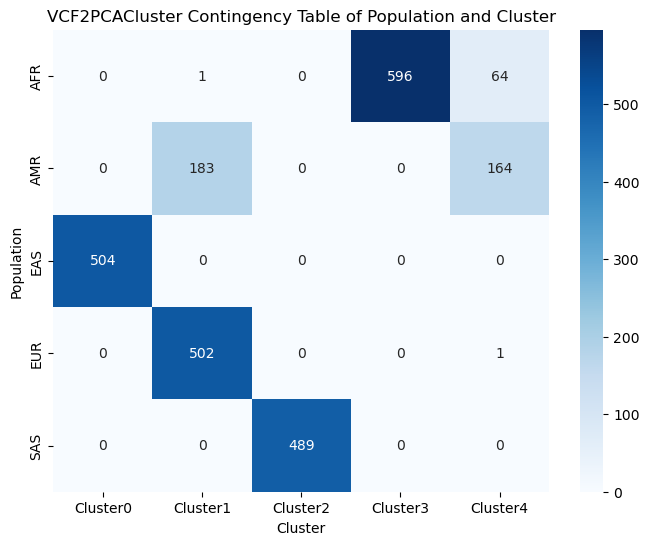

In [ ]:
# Load cluster assignments
cluster_assignments_bestK = pd.read_csv('cluster_assignments_bestK.txt', sep='\t')

# Create a contingency table of 'super_pop' and 'Cluster'
contingency_table_bestK = pd.crosstab(cluster_assignments_bestK['super_pop'], cluster_assignments_bestK['Cluster'])
print('Previous contingency table:')
print(contingency_table_bestK)

# Convert to cost matrix
cost_matrix_bestK = -contingency_table_bestK.values

# Hungarian algorithm
row_indices, col_indices = linear_sum_assignment(cost_matrix_bestK)

# Optimal mapping
optimal_mapping_bestK = {
    contingency_table_bestK.index[row]: contingency_table_bestK.columns[col] # Get the optimal mapping
    for row, col in zip(row_indices, col_indices) # Zip the row and column indices
}
print("Optimal Mapping with Missing Clusters Considered:")
print(optimal_mapping_bestK)

# Check if the super_pop is in the correct cluster based on the optimal mapping
merged_df['correct_cluster'] = merged_df.apply(
    lambda row: row['Cluster'] == optimal_mapping_bestK.get(row['super_pop'], None), axis=1 # Get the correct cluster
)

# Calculate the accuracy (proportion of correct assignments)
accuracy = merged_df['correct_cluster'].mean()
print(f"Accuracy (proportion of correctly assigned super_pop to optimal cluster): {accuracy:.2f}")

# Visualize the contingency table as a heatmap for better understanding
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_bestK, annot=True, cmap="Blues", fmt="d")
plt.title('VCF2PCACluster Contingency Table of Population and Cluster')
plt.ylabel('Population')
plt.xlabel('Cluster')
plt.show()

## ADMIXTURE Accuracy Assessments

In [ ]:
import subprocess

# Extract allele frequencies from the VCF file using bcftools
def extract_allele_frequencies(vcf_file, output_file):
    command = f"bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t%AF\t%EAS_AF\t%EUR_AF\t%AFR_AF\t%AMR_AF\t%SAS_AF\n' {vcf_file} > {output_file}" # Extract allele frequencies using VCF file format
    subprocess.run(command, shell=True, check=True) # Run the command

# Paths
vcf_file = "~/benchmarking_project/final_project/ground_truth/ground_truth2.vcf.gz"
allele_freq_file = "allele_freqs.tsv"

# Extract allele frequencies
extract_allele_frequencies(vcf_file, allele_freq_file)


In [ ]:
import pandas as pd
import numpy as np

allele_freq_file = "allele_freqs.tsv"

# Load allele frequencies into a DataFrame
allele_freqs = pd.read_csv(
    allele_freq_file, 
    sep='\t', 
    header=None, 
    names=['CHROM', 'POS', 'REF', 'ALT', 'AF', 'EAS_AF', 'EUR_AF', 'AFR_AF', 'AMR_AF', 'SAS_AF'] # Assign column names
)
# Load ADMIXTURE .P file (population allele frequencies) into a DataFrame
p_file = '/Users/Tyler/Documents/BIOI500/final_project/admixture_results/ground_truth2.5.P'
# Read the P file so that I can see how it is delimited
with open(p_file, 'r') as file:
    print(file.readline())
p_df = pd.read_csv(p_file, delim_whitespace=True, header=None) # Use whitespace as delimiter
print(p_df.head())
# Compare allele frequencies, assume columns in p_df correspond to pops in the same order as VCF File INFO
pops = ['EAS_AF', 'EUR_AF', 'AFR_AF', 'AMR_AF', 'SAS_AF']
p_df.columns = pops
print(p_df.head())

0.999990 0.999990 0.999990 0.999990 0.999042



/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_56490/3214426571.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  p_df = pd.read_csv(p_file, delim_whitespace=True, header=None)


          0        1         2         3         4
0  0.999990  0.99999  0.999990  0.999990  0.999042
1  0.997236  0.99999  0.999988  0.999990  0.999990
2  0.999990  0.99999  0.999990  0.999235  0.999990
3  0.999307  0.99999  0.999988  0.999990  0.999990
4  0.999983  0.99999  0.999990  0.990047  0.999990
     EAS_AF   EUR_AF    AFR_AF    AMR_AF    SAS_AF
0  0.999990  0.99999  0.999990  0.999990  0.999042
1  0.997236  0.99999  0.999988  0.999990  0.999990
2  0.999990  0.99999  0.999990  0.999235  0.999990
3  0.999307  0.99999  0.999988  0.999990  0.999990
4  0.999983  0.99999  0.999990  0.990047  0.999990


In [ ]:
# Ensure allele frequencies in allele_freqs are numeric
for pop in pops:
    if pop in allele_freqs.columns:
        allele_freqs[pop] = pd.to_numeric(allele_freqs[pop], errors='coerce') # Coerce to numeric

# Ensure ADMIXTURE allele frequencies are numeric
p_df = p_df.apply(pd.to_numeric, errors='coerce')


In [ ]:
import numpy as np

# Calculate error metrics (MSE, RMSE, MAE) between ADMIXTURE and VCF allele frequencies
errors = {"MSE": {}, "RMSE": {}, "MAE": {}}

for pop in pops:
    if pop in allele_freqs.columns:
        # Fill missing values with 0
        vcf_freqs = allele_freqs[pop].fillna(0)  
        admix_freqs = p_df[pop].fillna(0)
        
        # Calculate MSE
        mse = np.mean((vcf_freqs - admix_freqs) ** 2)
        # Calculate RMSE
        rmse = np.sqrt(mse)
        # Calculate MAE
        mae = np.mean(np.abs(vcf_freqs - admix_freqs))
        
        # Store results
        errors["MSE"][pop] = mse
        errors["RMSE"][pop] = rmse
        errors["MAE"][pop] = mae

# Print error metrics
print("Error Metrics between ADMIXTURE and VCF allele frequencies:")
for metric, metric_values in errors.items(): # Iterate through each error metric
    print(f"\n{metric}:")
    for pop, value in metric_values.items(): # Iterate through each population
        print(f"  {pop}: {value:.6f}")

# Summarize overall metrics across all populations
overall_metrics = {
    "Overall MSE": np.mean(list(errors["MSE"].values())),
    "Overall RMSE": np.sqrt(np.mean(list(errors["MSE"].values()))),
    "Overall MAE": np.mean(list(errors["MAE"].values())),
}

print("\nOverall Error Metrics:")
for metric, value in overall_metrics.items():
    print(f"  {metric}: {value:.6f}")


Error Metrics between ADMIXTURE and VCF allele frequencies:

MSE:
  EAS_AF: 0.894118
  EUR_AF: 0.896343
  AFR_AF: 0.879611
  AMR_AF: 0.879395
  SAS_AF: 0.892587

RMSE:
  EAS_AF: 0.945578
  EUR_AF: 0.946754
  AFR_AF: 0.937876
  AMR_AF: 0.937760
  SAS_AF: 0.944768

MAE:
  EAS_AF: 0.924219
  EUR_AF: 0.924628
  AFR_AF: 0.915751
  AMR_AF: 0.915736
  SAS_AF: 0.923179

Overall Error Metrics:
  Overall MSE: 0.888411
  Overall RMSE: 0.942555
  Overall MAE: 0.920703


In [ ]:
# Load ADMIXTURE .Q file into a DataFrame
q_file = '/Users/Tyler/Documents/BIOI500/final_project/admixture_results/ground_truth2.5.Q'
# Read the Q file so that I can see how it is delimited
with open(q_file, 'r') as file:
    print(file.readline())
q_df = pd.read_csv(q_file, delim_whitespace=True, header=None) # Use whitespace as delimiter
print(q_df.head())

0.949905 0.000010 0.039864 0.000010 0.010211

          0         1         2        3         4
0  0.949905  0.000010  0.039864  0.00001  0.010211
1  0.996246  0.003724  0.000010  0.00001  0.000010
2  0.998110  0.000010  0.000010  0.00001  0.001860
3  0.990300  0.000010  0.000010  0.00001  0.009670
4  0.999960  0.000010  0.000010  0.00001  0.000010


/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_56490/433864599.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  q_df = pd.read_csv(q_file, delim_whitespace=True, header=None)


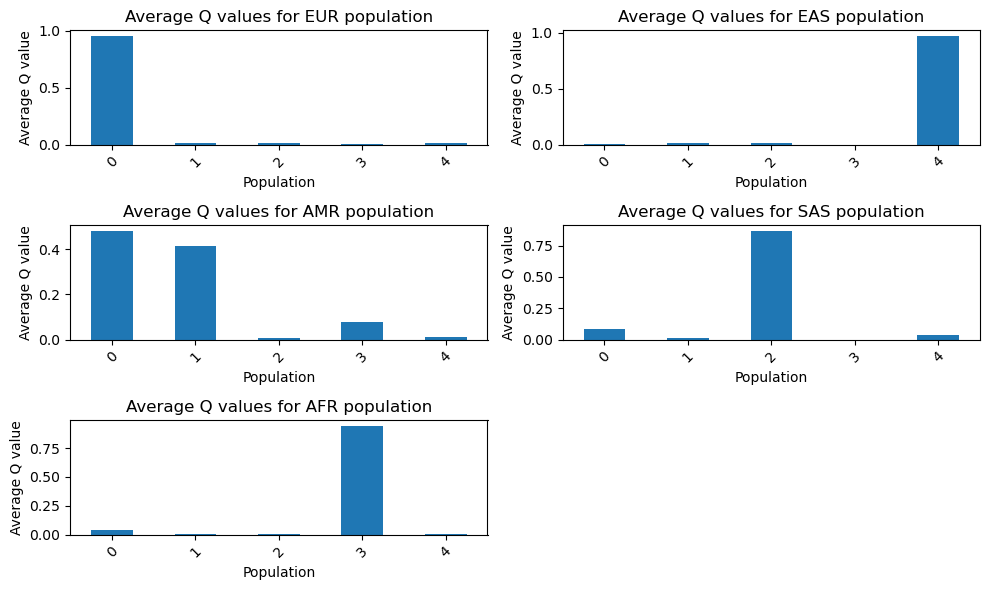

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with 3 rows and 2 columns (to accommodate 5 populations)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each unique population and plot the average Q values
for i, true_pop in enumerate(q_df['True_Population'].unique()):
    # Select all individuals for the current population
    pop_df = q_df[q_df['True_Population'] == true_pop]
    
    # Average the Q values across all individuals in the population (columns '0', '1', '2', '3', '4')
    avg_q_values = pop_df.iloc[:, :5].mean()
    
    # Plot the average Q values for the population in the corresponding subplot
    avg_q_values.plot(kind='bar', ax=axes[i], figsize=(10, 6))
    axes[i].set_xlabel('Population')
    axes[i].set_ylabel('Average Q value')
    axes[i].set_title(f'Average Q values for {true_pop} population')
    axes[i].set_xticks(range(len(avg_q_values)))
    axes[i].set_xticklabels(avg_q_values.index, rotation=45)  # Rotate x labels for better visibility

# Remove the last subplot (since I have 5 populations and 6 subplots)
axes[-1].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [ ]:
# Map sample IDs to populations
sample_to_pop = dict(zip(metadata["sample"], metadata["super_pop"]))  
q_df["True_Population"] = q_df["sample"].map(sample_to_pop) # Map sample IDs to populations
print(q_df.head())

# Map the Q values indices to population names (based on earlier analysis of plots, AMR samples make this hard though)
pop_map = {0: "EUR", 3: "AFR", 2: "SAS", 4: "EAS", 1: "AMR"}

# Assign predicted population based on maximum Q value
q_df["Predicted_Population"] = q_df.iloc[:, :5].idxmax(axis=1).map(pop_map) # Map Q values to populations and assign
print(q_df.head())

# Calculate accuracy
accuracy = (q_df["True_Population"] == q_df["Predicted_Population"]).mean() 
print(f"Classification Accuracy: {accuracy:.2%}")


          0         1         2        3         4   sample True_Population  \
0  0.949905  0.000010  0.039864  0.00001  0.010211  HG00096             EUR   
1  0.996246  0.003724  0.000010  0.00001  0.000010  HG00097             EUR   
2  0.998110  0.000010  0.000010  0.00001  0.001860  HG00099             EUR   
3  0.990300  0.000010  0.000010  0.00001  0.009670  HG00100             EUR   
4  0.999960  0.000010  0.000010  0.00001  0.000010  HG00101             EUR   

  Predicted_Population  
0                  AMR  
1                  AMR  
2                  AMR  
3                  AMR  
4                  AMR  
          0         1         2        3         4   sample True_Population  \
0  0.949905  0.000010  0.039864  0.00001  0.010211  HG00096             EUR   
1  0.996246  0.003724  0.000010  0.00001  0.000010  HG00097             EUR   
2  0.998110  0.000010  0.000010  0.00001  0.001860  HG00099             EUR   
3  0.990300  0.000010  0.000010  0.00001  0.009670  HG00100

Filtering through each population to map accuracy since an overall accuracy score is not helpful for admixed populations some times. AMR Q values do not really have their own "cluster" as they have a high Q value within EUR populations as well.

In [ ]:
# List of unique populations in True_Population
populations = q_df["True_Population"].unique()
print(populations)

# Loop through each population
for pop in populations:
    # Filter rows where the True_Population matches the current population
    pop_df = q_df[q_df["True_Population"] == pop]
    
    # Filter rows where the Predicted_Population matches the current population
    pop_predicted_df = pop_df[pop_df["Predicted_Population"] == pop]
    
    # Calculate the accuracy for the current population
    accuracy_pop = len(pop_predicted_df) / len(pop_df) 
    print(f"Accuracy for {pop} prediction: {accuracy_pop:.2%}\n")


['EUR' 'EAS' 'AMR' 'SAS' 'AFR']
Accuracy for EUR prediction: 100.00%

Accuracy for EAS prediction: 100.00%

Accuracy for AMR prediction: 40.06%

Accuracy for SAS prediction: 98.98%

Accuracy for AFR prediction: 98.94%



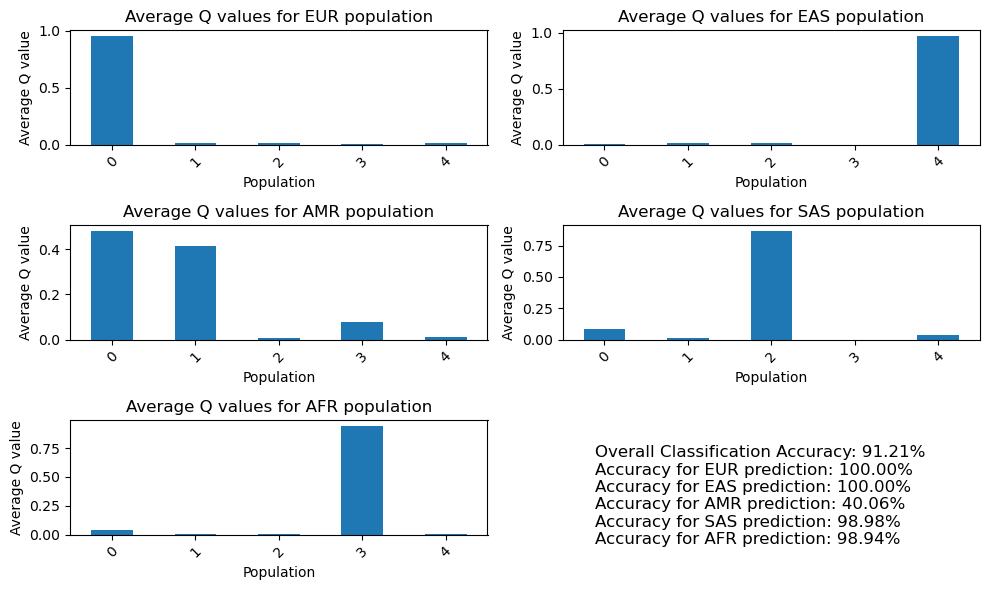

In [131]:
import matplotlib.pyplot as plt

# Create subplots with 3 rows and 2 columns (to accommodate 5 populations)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Calculate overall classification accuracy
accuracy = (q_df["True_Population"] == q_df["Predicted_Population"]).mean()

# List of unique populations in True_Population
populations = q_df["True_Population"].unique()

# Loop through each unique population and plot the average Q values
for i, true_pop in enumerate(populations):
    # Select all individuals for the current population
    pop_df = q_df[q_df['True_Population'] == true_pop]
    
    # Average the Q values across all individuals in the population (columns '0', '1', '2', '3', '4')
    avg_q_values = pop_df.iloc[:, :5].mean()
    
    # Plot the average Q values for the population in the corresponding subplot
    avg_q_values.plot(kind='bar', ax=axes[i], figsize=(10, 6))
    axes[i].set_xlabel('Population')
    axes[i].set_ylabel('Average Q value')
    axes[i].set_title(f'Average Q values for {true_pop} population')
    axes[i].set_xticks(range(len(avg_q_values)))
    axes[i].set_xticklabels(avg_q_values.index, rotation=45)  # Rotate x labels for better visibility

# Remove the last subplot (since we have 5 populations and 6 subplots)
axes[-1].axis('off')

# Display accuracy for each population
accuracy_text = f"Overall Classification Accuracy: {accuracy:.2%}\n"
for pop in populations:
    # Filter rows where the True_Population matches the current population
    pop_df = q_df[q_df["True_Population"] == pop]
    
    # Filter rows where the Predicted_Population matches the current population
    pop_predicted_df = pop_df[pop_df["Predicted_Population"] == pop]
    
    # Calculate the accuracy for the current population
    accuracy_pop = len(pop_predicted_df) / len(pop_df)
    accuracy_text += f"Accuracy for {pop} prediction: {accuracy_pop:.2%}\n"

# Add the text to the empty space on the right
fig.text(0.6, 0.15, accuracy_text, ha='left', va='center', fontsize=12, wrap=True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()
